# Math 314 Lab 1

## $k$-means algorithm

**Name:**

**Date:**

See companion PDF on the course website for background and instructions.

## Exercise 1

Attach handwritten computation.

## Exercise 2

Your response goes here.

## Exercise 3

Attach handwritten computation

## Exercise 4

### Part a)

In [4]:
# Define the function `J(x,y)` here.

### Parts b) - d)

In [6]:
# Commands to make the contour plot go here
# along with the commands to add the data points
# and the location of the minimum.

## Exercise 5

In [7]:
# Fill in the body of the function `dist_sq` below.

In [8]:
function dist_sq(a,b)
  # Your code goes here.
end

dist_sq (generic function with 1 method)

Verify that this gives the correct output:

In [ ]:
a = [-1, 2, 2]
b = [3, 5, 1]

dist_sq(a,b)

## Exercise 6

In [13]:
p1 = [1,3]; p2 = [4,7]; p3 = [2, -2]
r1 = [0, 0]; r2 = [1, 4]
c = [1, 1, 2];

In [ ]:
# Compute distances between `p1` and the 
# representatives `r1` and `r2`:
[ dist_sq(p1,r1), dist_sq(p1,r2) ]

In [ ]:
# Now do the same for `p2`

In [ ]:
# Now do the same for `p3`

In [ ]:
# Enter the new value of `c` here:
c = 

## Exercise 7

Attach hand computation.

Then do the same computation using Julia:

In [ ]:
# Compute the new r1 here
r1 = 

In [ ]:
# Compute the new r2 here
r2 = 

## Exercise 8

In [ ]:
# Here's the starting data from Exercise 6
p1 = [1,3]; p2 = [4,7]; p3 = [2, -2]
r1 = [0, 0]; r2 = [1, 4]
c = [1, 1, 2];

In [ ]:
# Use the data above to compute the value of J_clust


In [ ]:
# Now enter the new values of `c` and `r1` and `r2`
# from exercises 6 and 7
r1 = 
r2 =
c = 

In [ ]:
# Use the updated data above to compute the new value of J_clust


## Exercise 9

Your answer goes here.  Attach a handwritten response if that works better for you.

## Exercise 10

Your answer goes here.  Attach a handwritten response if that works better for you.

## Exercise 11

Your answer goes here.  Attach a handwritten response if that works better for you.

## Exercise 12

The point of this exercise is to fill in a bit of the code for one of the key
functions needed for the $k$-means algorithm.  The part you are adding is related to an `if` statement,
and I need to first show you how `if` statements work.

In Julia, you can execute code based on whether or not some condition is true.  Here's a sample

In [38]:
if 5 > 0
    println("five is positive")
end

five is positive


The condition `5>0` is true, so the `println` statement is exectuted.

Compare:

In [39]:
if 5 < 0
    println("five is negative")
end

Now the condition `5<0` is false, so the `println` does not happen.

The function `nearest_rep` below is nearly complete.
It receives a single vector `p0` and a matrix `reps`
    where `reps[i,j]` is the i-th component of representaive $r_j$.  The job of `nearest_rep` is to return the index
    `j` of the representative that is closest to `p0`.
    The function is heavily commented, so you should be able to follow along with what it is doing. Please contact me if you have questions!

There is a single `if` statement missing from the 
function at the spot labeled `FILL THIS PART IN`.
Follow the instructions an enter in the `if` statement.

In [40]:
"""
Given a single vector `p0` and a matrix of
representatives `reps`, returns the index
of the representative that is closes to `p`.
"""
function nearest_rep(p0, reps)
    # Strategy: 
    # Run through the list of representatives
    # and keep track of the closest distance found so far,
    # and the index of the representative where that
    # distance was found.  
    #
    # Once we have looked at all the representativees,
    # return the best index.
    
    # Best distance found thus far.  Infinity to begin.
    best_d= Inf
    # Index of the best matching representative.
    best_index = 0

    # Determine the number of representatives.
    n_reps = size(reps)[2]

    # For each representative
    for j in 1:n_reps

        # Compute the distance from p0 to representative `j`
        d = dist_sq(p0, reps[:,j])

        ## FILL THIS PART IN:
        ##
        ## If d is less than `best_d`, 
        ## set `best_d` to the value of `d`
        ## just computed and update `best_index`
        ## to be the value of `j`.

    end
    return best_index
end


nearest_rep

Test that your code is correct as follows.

First some setup code.

In [41]:
# Single point
p = [ 0.0, 0, 0]

# Three representatives
r1 = [ 4, 1, 2]
r2 = [ 1, 0.5, 4]
r3 = [6, -4, 8]

# Make a matrix with each column being one of the
# representatives.  The function `hcat` does 
# horizontal concatenation.
reps = hcat(r1, r2, r3)

3×3 Matrix{Float64}:
 4.0  1.0   6.0
 1.0  0.5  -4.0
 2.0  4.0   8.0

The closest of `r1`, `r2` and `r3` to the
origin is `r2`.  So if your function is correct,
this command will return 2.

In [ ]:
nearest_rep(p, reps)

## Interlude: main code for the k-means algorithm

First three helper functions:
1) `update_clusters` to do the cluster update step
2) `update_reps` to do the representative update step
3) `compute_J_clust` to compute the objective functional

In [54]:
"""
Given points `p`, current cluster representatives
`reps` and cluster assignments `c`, updates the
cluster assignments so that cluster assignment
`c[j]` is `k` if `reps[:,k]` is closest to `p[:,j]`.

Returns the new cluster assignment vector.
"""
function update_clusters(p, reps, clusters)
    M = size(p)[2]

    new_clusters = zeros(Int, M)
    for j = 1:M
        new_clusters[j] = nearest_rep(p[:,j], reps)
    end

    return new_clusters
end


"""
Given points `p`, current cluster representatives
`reps` and cluster assignments `c`, updates the
representatives so that `reps[:,j]` is the average
of all the vectors in category `j`.

Returns the new matrix of representative vectors.
"""
function update_reps(p, reps, clusters)

    N = size(p)[1]
    M = size(p)[2]
    K = size(reps)[2]
    
    counts = zeros(K)

    new_reps = zeros(N, K)
    for m in 1:M
        # determine which cluster p_m is assigned to
        k = clusters[m]

        # add p_m to the representative for the cluster
        # and update the number of elements in the cluster
        new_reps[:,k] += view(p,:,m)
        counts[k] += 1
    end

    # Now divide each representative by the number of vectors in the cluster.
    for k in 1:K
        cluster_size = counts[k]
        if cluster_size == 0
            new_reps[:,k] = reps[:,k]
        else
            new_reps[:,k] /= cluster_size
        end
    end

    return new_reps
end

"""
Given points `p`, representatives `reps` and
cluster assignments `c`, computes the value of
the objective functional J_clust.
"""
function compute_J_clust(p, reps, clusters)
  M = size(p)[2]
  J = 0
  for m=1:M
    J = J + dist_sq(p[:,m], reps[:,clusters[m]])
  end

  J = J / M
end;


Now the main function, `k_means`, which performs the complete algorithm a specified number of iterations.

In [131]:
import Random

"""
Applies `N` iterations of the k-means algorithm
to the vectors `p` with `k` categories.

The matrix `p` contains vectors arranged in columns.

Each  vector in `p` is assigned to a random category initially.

Returns: (reps, clusters, J)

reps: matrix of cluster representatives
clusters: vector of cluster assignments
J: vector of values of J_clust per iteration
"""
function k_means(p, k, N)

    n = size(p)[1]
    m = size(p)[2]

    J = Float64[]
    
    # Make a random vector `cluster` of length `n` where the 
    # entries of `cluster` record .  So if `cluster[3]=7`
    # this means that the third vector in `x` has been assigned
    # to cluster 7
    
    Random.seed!(1971)
    clusters = Random.rand( 1:k, (m,) )

    reps = zeros(n,k)

    reps = update_reps(p, reps, clusters)
    
    for _ in 1:N
        clusters = update_clusters(p, reps, clusters)
        reps = update_reps(p, reps, clusters)
        J_now = compute_J_clust(p, reps, clusters)
        push!(J, J_now);
    end

    return reps, clusters, J
end
    

k_means

## Exercise 13

First, create some random data in the plane in three categories.  Each category is clustered around one of the points (1.3,1), (-1,-1) and (0, 2).

In [75]:
import Random
Random.seed!(1971)

# Create 20 vectors in category A
pa = 0.5*Random.randn((2,20)) .+ [1.3,1]

# Create 20 vectors in category B
pb = 0.5*Random.randn((2,20)) .+ [-1,-1]

# Create 20 vectors in category C
pc = 0.3*Random.randn((2,20)) .+ [-0.0,2]

# Combine all the vectors into one big matrix
p = hcat(pa,pb,pc)

2×60 Matrix{Float64}:
 1.36245  0.834736  1.76814  0.127316  …  -0.558285  -0.326154  0.228171
 1.48784  1.78962   1.34419  1.03923       2.29607    2.18244   1.47845

### Visualize the data

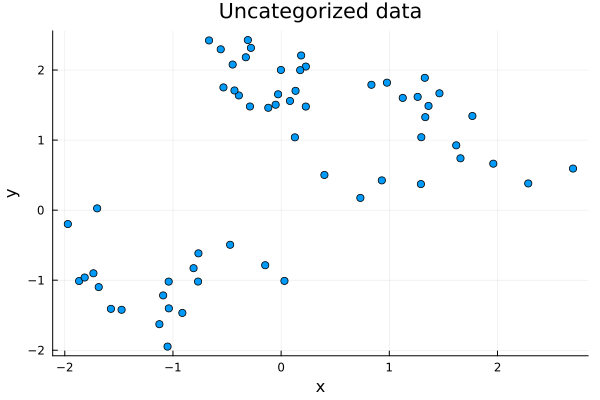

In [76]:
import Plots

Plots.scatter(p[1,:], p[2,:], marker=:circle, legend=nothing,
  xlabel="x", ylabel="y", title="Uncategorized data")

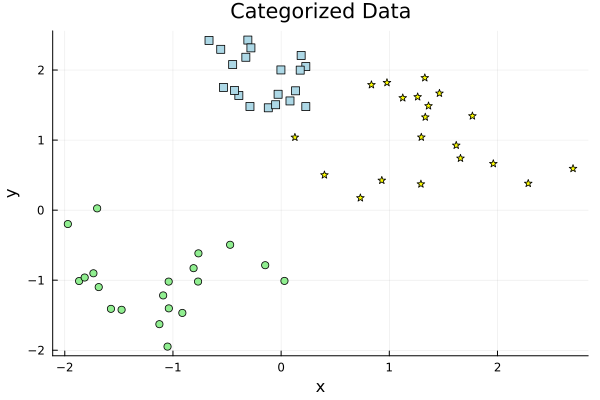

In [128]:
Plots.scatter(pa[1,:], pa[2,:], marker=:star, color=:yellow, legend=nothing,
xlabel="x", ylabel="y", title = "Categorized Data")
Plots.scatter!(pb[1,:], pb[2,:], marker = :circle, color=:lightgreen)
Plots.scatter!(pc[1,:], pc[2,:], marker = :square, color=:lightblue)

Let's visualize the results after running 
zero steps of the algorithm.  The algorithm
starts by assigning random categories to each data point,
so we should see random assignments.

In [109]:
n_categories = 3
n_iters = 0

(reps, clusters, j) = k_means( p, n_categories, n_iters);

In [110]:
# `group_a` is a vector with entries `true` or `false`.
# Entry 'j' is `true` if `clusters[j]` is a 1.
group_a = clusters .== 1;

# Matrix pa_hat contains all the vectors `p` in 
# category A.  Notice how `group_a` is used to select
# the columns we want.
pa_hat = p[:,group_a]

group_b = clusters .== 2;
pb_hat = p[:,group_b]

group_c = clusters .== 3;
pc_hat = p[:,group_c];

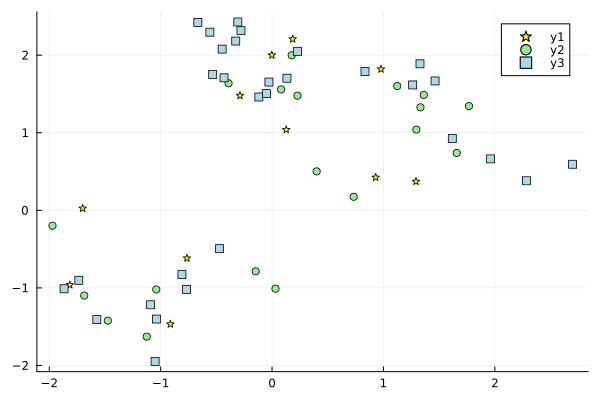

In [111]:
Plots.scatter(pa_hat[1,:], pa_hat[2,:], marker=:star, color=:yellow)
Plots.scatter!(pb_hat[1,:], pb_hat[2,:], marker = :circle, color=:lightgreen)
Plots.scatter!(pc_hat[1,:], pc_hat[2,:], marker = :square, color=:lightblue)

Now your turn.  Generate a similar plot, but after 3 iterations instead.

In [133]:
# Code to generate plot goes here.

## Exercise 14

Run the $k$-means algorithm on the data for 10 iterations
    and generate a graph of the value of $J_{clust}$ over the iterations.

In [132]:
# Code to generate graph goes here.

At what iteration would it have been reasonable to stop?

**Response goes here**

## Exercise 15

Generate a plot of the category assignments (like those in Exercise 13) after 10 iterations.

In [134]:
# Code to generate graph goes here

Comment on the quality of the category assignments.

**Response goes here**